In [2]:
## Michael Janke - Assignment 2
## Import Modules
import numpy as np
import pandas as pd

In [3]:
## Read train term matrix (5500 terms, 800 documents)
## Term frequency matrix where each column appears to be a document.
trainMatrixModified = pd.read_table('trainMatrixModified.txt', sep='\t', header=None)

## Transpose Matrix
trainMatrixModified = trainMatrixModified.T

In [5]:
trainMatrixModified.head(5)

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,2.0,2.0,2.0,1.0,8.0,6.0,2.0,8.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
## Read test term matrix (5500 terms, 200 documents)
## Term frequency matrix where each column appears to be a document.
testMatrixModified = pd.read_table('testMatrixModified.txt', sep='\t', header=None)

## Transpose Matrix
testMatrixModified = testMatrixModified.T

In [7]:
testMatrixModified.head(5)

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
## Read train and test classes
trainClasses = pd.read_table('trainClasses.txt', sep='\t', header=None)
trainClasses.head(5)

,0,1
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0


In [10]:
testClasses = pd.read_table('testClasses.txt', sep='\t', header=None)
testClasses.head(5)

,0,1
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1


In [11]:
## Read modified terms
modifiedTerms = pd.read_table('modifiedTerms.txt', sep='\t', header=None)
modifiedTerms

,0
0,david
1,rex
2,wood
3,subject
4,call
5,librari
6,creat
7,widget
8,multipl
9,time


In [12]:
## Create data frames to arrays
trainMatrixModifiedArray = np.array(trainMatrixModified)
testMatrixModifiedArray = np.array(testMatrixModified)

In [13]:
## Define a function for kNN search
## x = instance to be classified
## D = data matrix
## L = labels
## K = number of neighbors
## measure = euclidean or cosine (0 or 1)

def knn_search(x, D, L, K, measure):
    """ find K nearest neighbours of data point x among D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        sims = np.dot(D,x)/(D_norm * x_norm) ## cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting

    # return the indexes of K nearest neighbors
    return idx[:K], sorted(dists)[:K], round(np.array(L.iloc[:,[1]].T[idx[:K]]).mean())

In [14]:
## instance to be classified; read from testMatrixModified

## set index
i = 7

x = np.array(testMatrixModified.iloc[i])
x

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
# Finding the k=15 nearest neighbors using inverse of Cosine similarity as a distance metric
neigh_idx, distances, predictedClass = knn_search(x, trainMatrixModifiedArray, trainClasses, 15, 1)

In [16]:
## Index 
neigh_idx

array([602, 770, 354, 116, 715, 169, 448, 774, 416, 592, 182,  10, 541,
       290, 783], dtype=int64)

In [17]:
distances

[0.6745277225479404,
 0.674551922129925,
 0.7020873852283833,
 0.7053674186468871,
 0.7182702692756072,
 0.7199100801597353,
 0.7252991175890636,
 0.7269134364593515,
 0.7332301129567425,
 0.7332660050834415,
 0.7399800858665841,
 0.7411493338612172,
 0.7418836942593483,
 0.7424938286930244,
 0.7435803775182408]

In [18]:
trainMatrixModifiedArray[neigh_idx]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
predictedClass

1.0

In [20]:
## actual class
testClasses.iloc[[i],[1]]

,1
7,1


In [21]:
predictedClass == testClasses.iloc[[i],[1]]

,1
7,True


In [22]:
# Finding the k=15 nearest neighbors using euclidean distance metric
neigh_idx2, distances, predictedClass = knn_search(x, trainMatrixModifiedArray, trainClasses, 15, 0)

In [23]:
## Index 
neigh_idx2

array([798, 757, 743,  38, 224, 706, 398, 119, 711,  69, 464, 615, 751,
       342, 551], dtype=int64)

In [24]:
predictedClass

0.0

In [25]:
## actual class
testClasses.iloc[[i],[1]]

,1
7,1


In [26]:
predictedClass == testClasses.iloc[[i],[1]]

,1
7,False


In [27]:
np.array(trainClasses.iloc[:,[1]].T[neigh_idx])

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [28]:
np.array(trainClasses.iloc[:,[1]].T[neigh_idx2])

array([[1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]], dtype=int64)

In [29]:
## Check length
## This is a test block for learning. Remove later
len(testMatrixModified)

count = len(testMatrixModified)
i = 0
    
while i < count:
    print(i)
    i += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [30]:
## 1.b function to return accuracy

## T = test matrix
## D = train matrix (array)
## L = labels (matrix)
## K = number of neighbors
## measure = euclidean or cosine (0 or 1)

def knn_accuracy(T, D, L, K, measure):

    matches = 0.00
    count = len(T)
    i = 0
    
    while i < count:
        
        neigh_idx, distances, predictedClass = knn_search(np.array(T.iloc[i]), D, L, K, measure)
        
        isMatch = predictedClass == L.iloc[[i],[1]]

        if isMatch.bool() == True:
            matches += 1
            
        i += 1
    
    # return accuracy measure
    return matches / count

In [31]:
knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, 15, 1)

0.495

In [32]:
knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, 15, 0)

0.465

In [300]:
knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, 5, 1)

0.5

In [301]:
knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, 5, 0)

0.495

In [302]:
knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, 9, 1)

0.505

In [303]:
knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, 9, 0)

0.48

In [48]:
## Graph the euclidean accuracy for K 1 - 20
euclideanDF = pd.DataFrame(columns=['K', 'accuracy'])

i = 1
    
while i <= 20:
    acc = knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, i, 0)
    print(i, acc)
    euclideanDF.loc[len(euclideanDF)] = [i, acc]
    i += 1

(1, 0.47)
(2, 0.495)
(3, 0.51)
(4, 0.48)
(5, 0.495)
(6, 0.495)
(7, 0.485)
(8, 0.5)
(9, 0.48)
(10, 0.46)
(11, 0.465)
(12, 0.46)
(13, 0.465)
(14, 0.48)
(15, 0.465)
(16, 0.46)
(17, 0.46)
(18, 0.475)
(19, 0.49)
(20, 0.495)


In [49]:
euclideanDF

,K,accuracy
0,1.0,0.470
1,2.0,0.495
2,3.0,0.510
3,4.0,0.480
4,5.0,0.495
5,6.0,0.495
6,7.0,0.485
7,8.0,0.500
8,9.0,0.480
9,10.0,0.460


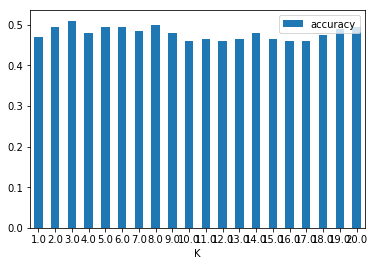

In [51]:
euclideanDF.plot.bar(x='K', rot=0)

In [52]:
## Graph the cosine accuracy for K 1 - 20
cosineDF = pd.DataFrame(columns=['K', 'accuracy'])

i = 1
    
while i <= 20:
    acc = knn_accuracy(testMatrixModified, trainMatrixModifiedArray, trainClasses, i, 1)
    print(i, acc)
    cosineDF.loc[len(cosineDF)] = [i, acc]
    i += 1

(1, 0.475)
(2, 0.47)
(3, 0.49)
(4, 0.49)
(5, 0.5)
(6, 0.495)
(7, 0.5)
(8, 0.505)
(9, 0.505)
(10, 0.495)
(11, 0.5)
(12, 0.5)
(13, 0.5)
(14, 0.495)
(15, 0.495)
(16, 0.495)
(17, 0.495)
(18, 0.495)
(19, 0.495)
(20, 0.495)


In [53]:
cosineDF

,K,accuracy
0,1.0,0.475
1,2.0,0.470
2,3.0,0.490
3,4.0,0.490
4,5.0,0.500
5,6.0,0.495
6,7.0,0.500
7,8.0,0.505
8,9.0,0.505
9,10.0,0.495


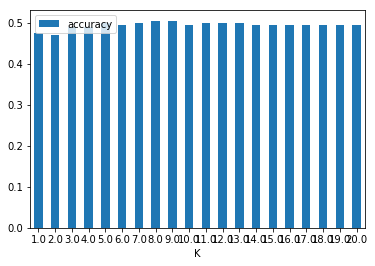

In [54]:
cosineDF.plot.bar(x='K', rot=0)